**import necessary libraries**

In [ ]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Optional: Set plot style for better aesthetics
sns.set(style="whitegrid")

# Enable inline plotting for Jupyter
%matplotlib inline

**load the data set**

In [ ]:
# Cell 2: Load the dataset
# Replace 'sales_discounts.csv' with the path to your dataset file
df = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


**descriptive analytics for numerical columns**

In [ ]:
# Cell 3: Descriptive analytics for numerical columns
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
print(f"Numerical Columns: {numerical_columns}")

# Calculate and display mean, median, mode, and standard deviation for each numerical column
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]  # mode() returns a Series; taking the first value
    std_dev = df[col].std()

    print(f"\nStatistics for {col}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")

Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213923

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993647

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255325

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.22060215332551

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.902963353998

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.65662406695


**data visualization**

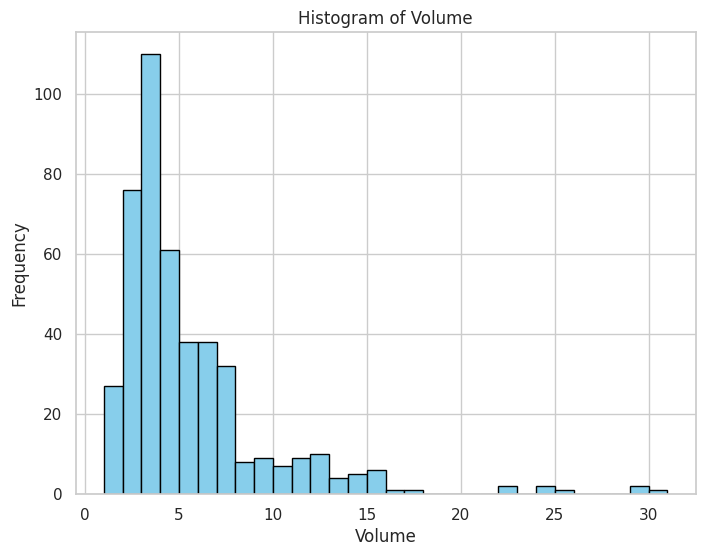

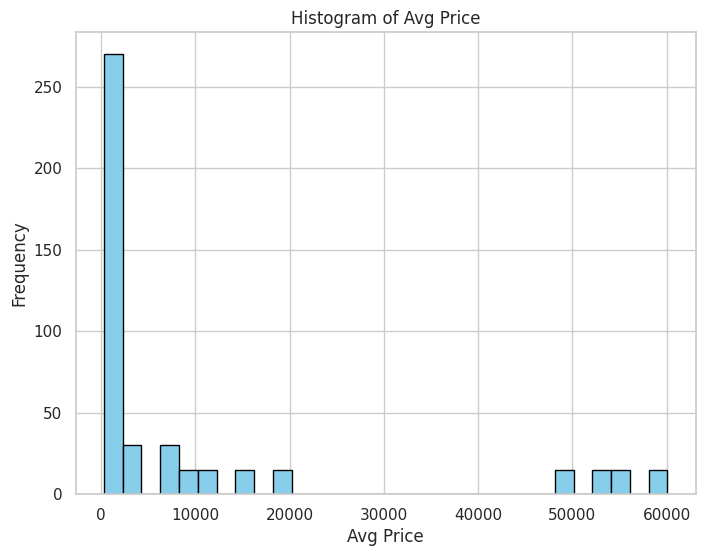

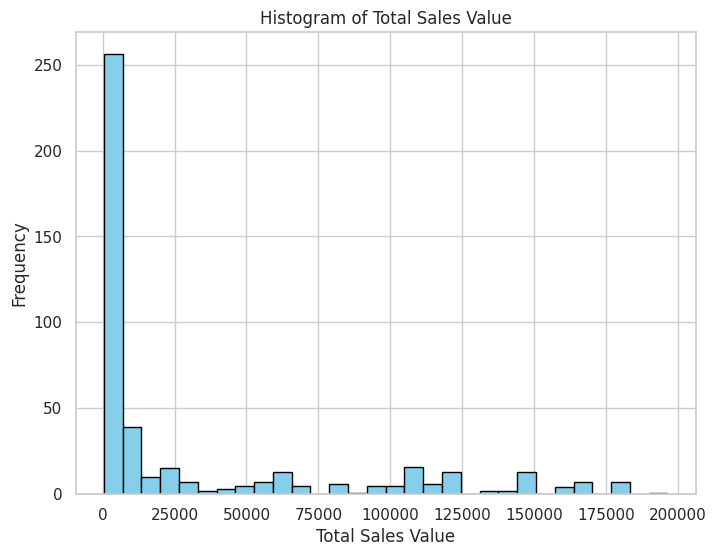

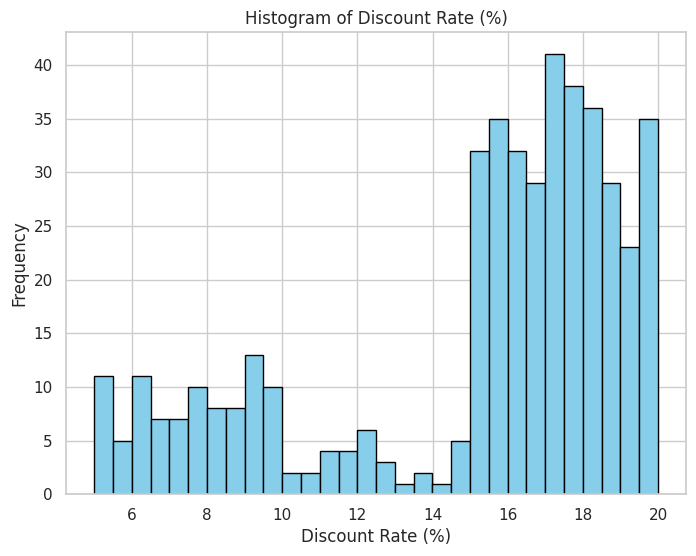

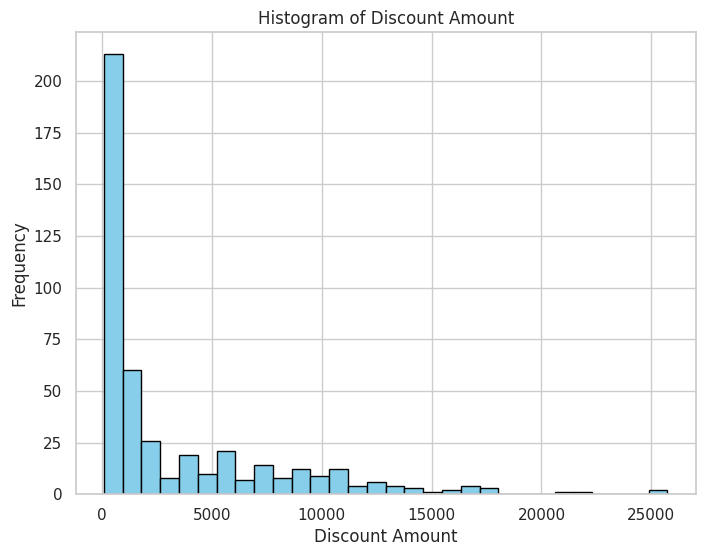

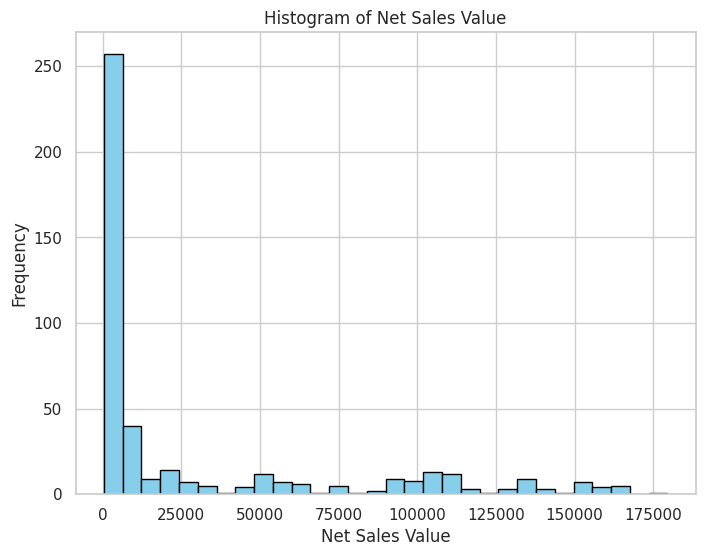

In [ ]:
# Cell 4: Histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**boxplots**

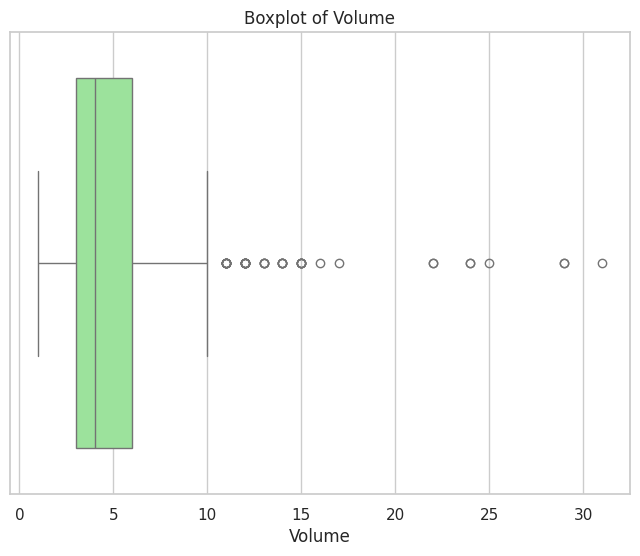

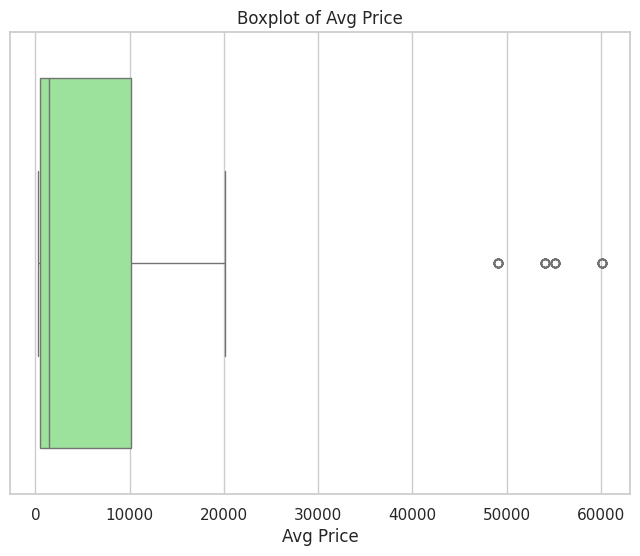

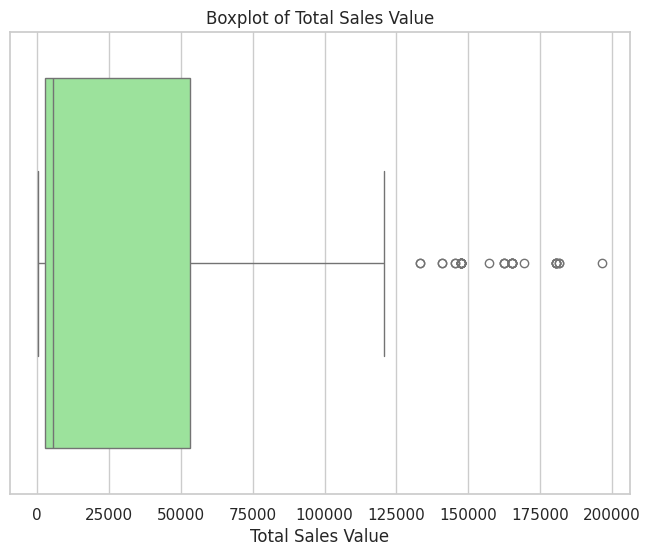

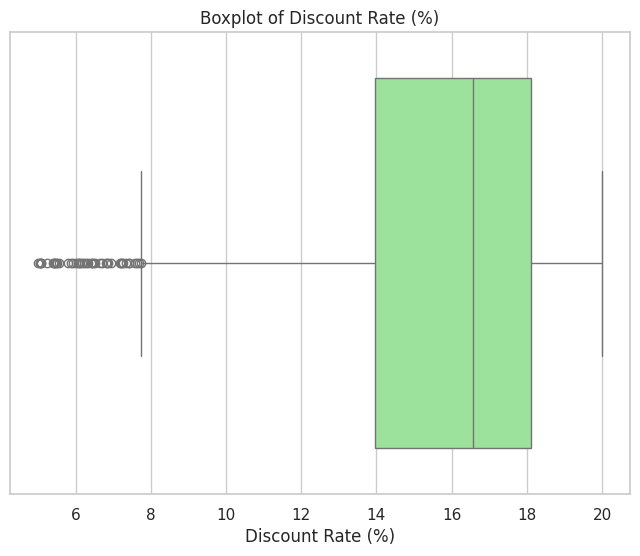

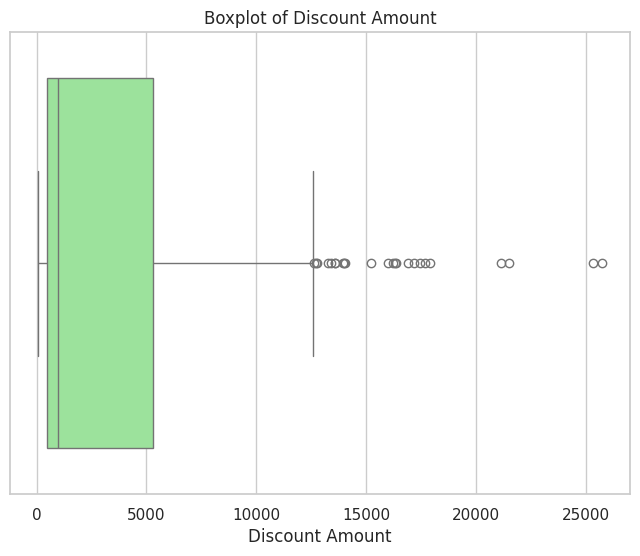

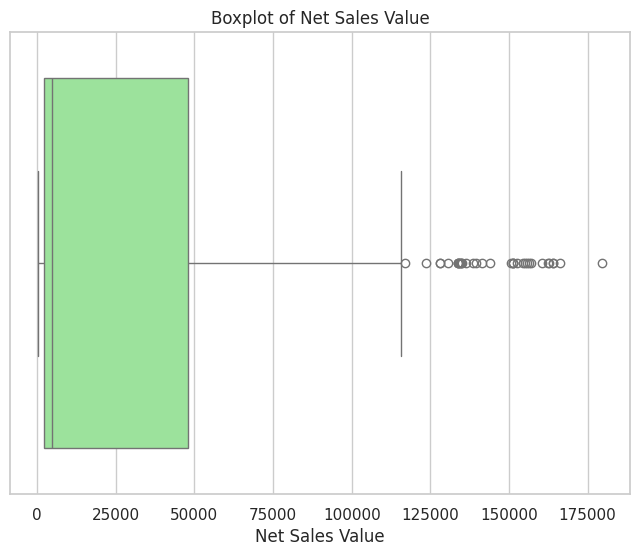

In [ ]:
# Cell 5: Boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

**box chart analysis for cathegorical columns**

Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


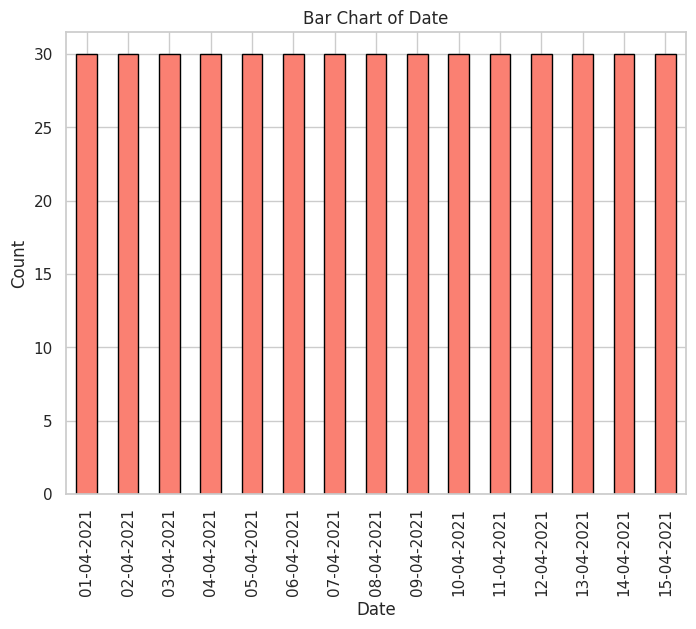

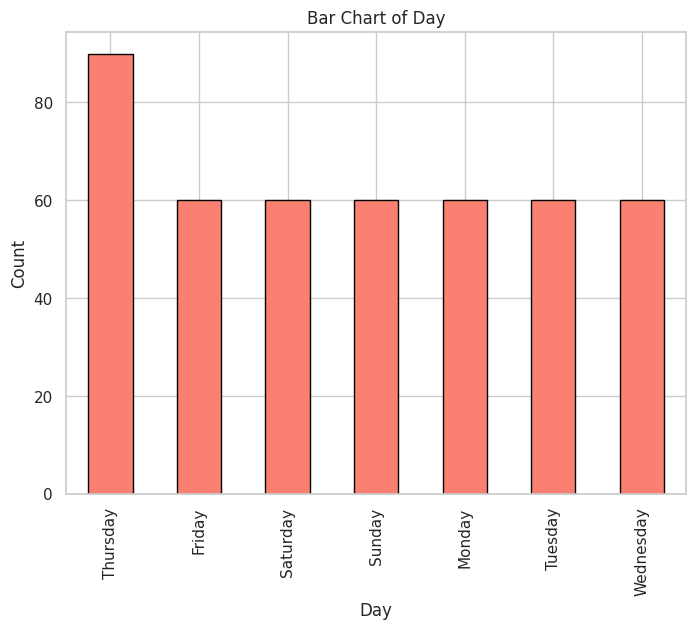

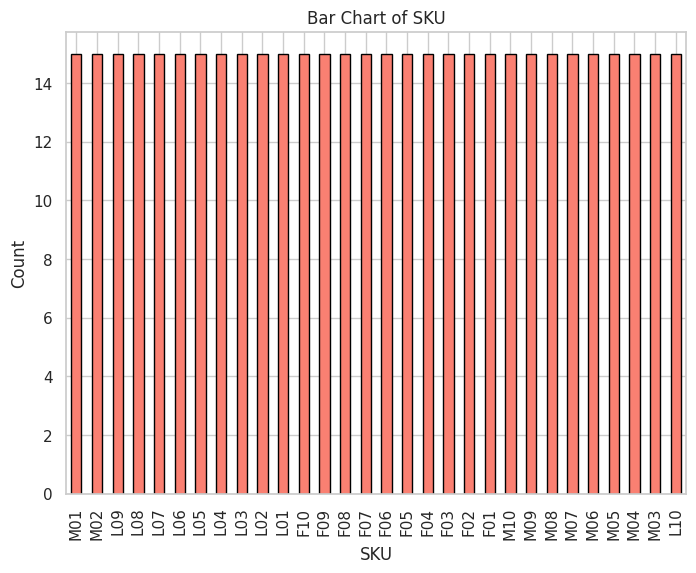

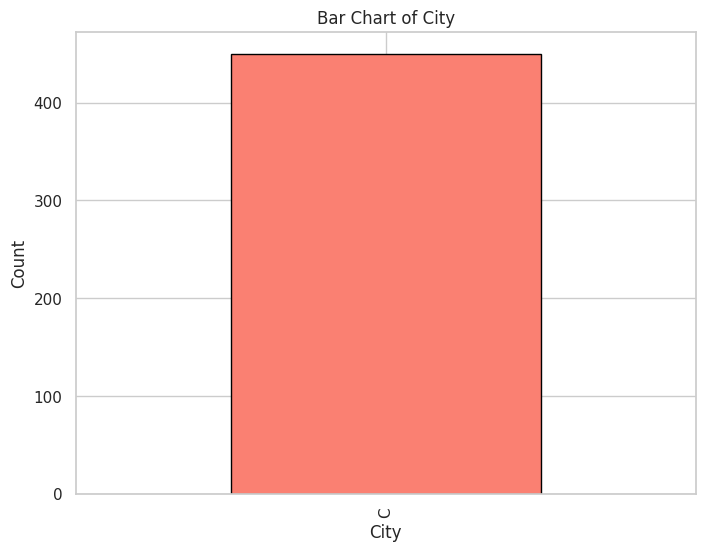

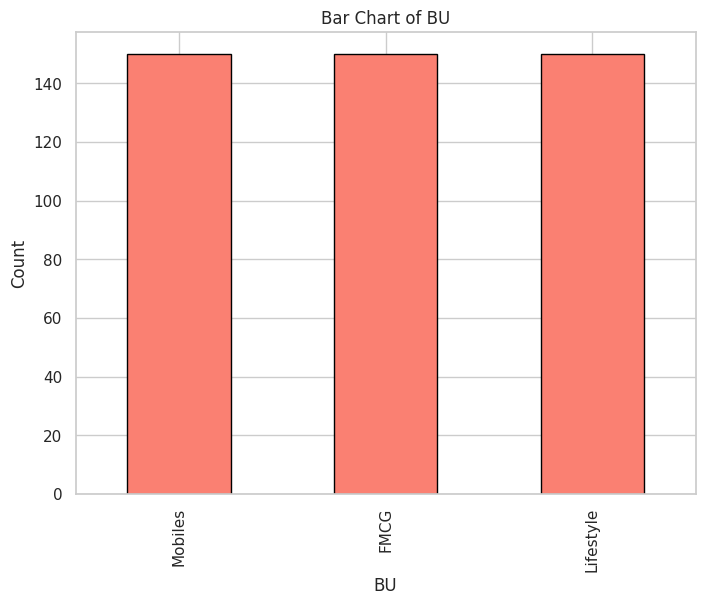

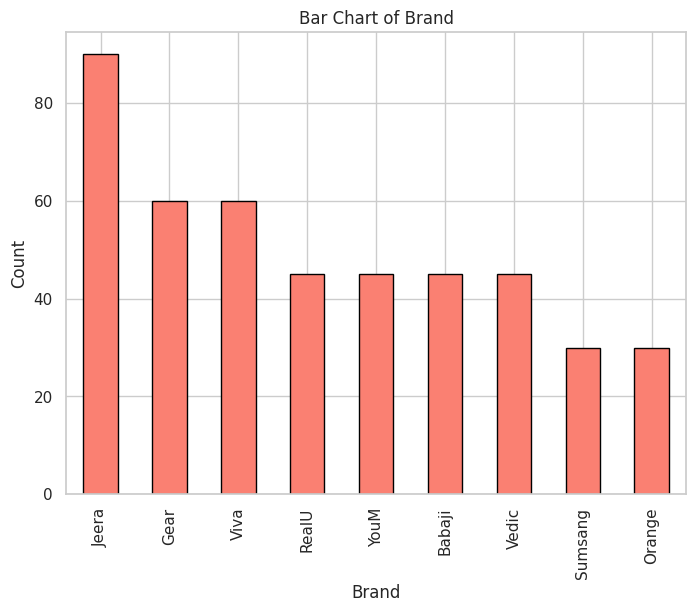

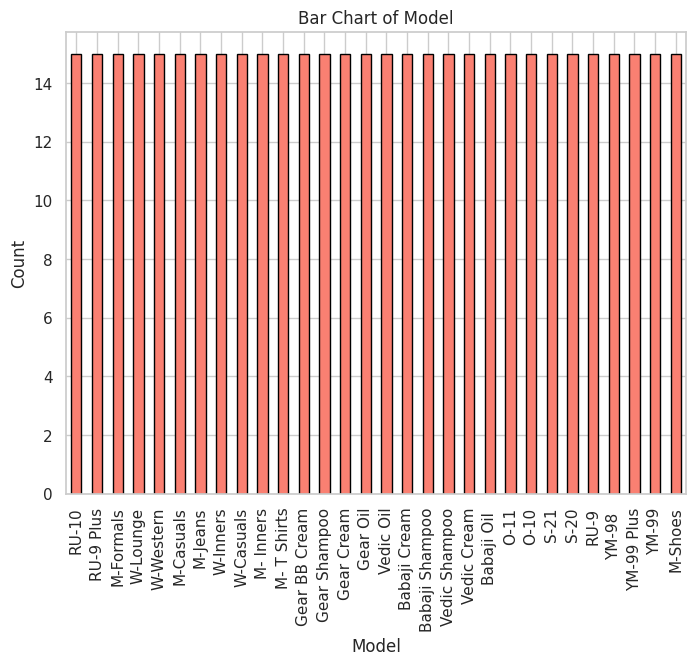

In [ ]:
# Cell 6: Bar chart analysis for categorical columns
# Identify categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
print(f"Categorical Columns: {categorical_columns}")

# Create bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**standardization of numerical variables**

In [ ]:
# Cell 7: Standardization of numerical variables
# Standardize numerical columns using z-score normalization
df_standardized = df.copy()  # Create a copy to preserve the original dataset
for col in numerical_columns:
    df_standardized[col] = (df[col] - df[col].mean()) / df[col].std()

# Show before and after standardization comparison
print("Before Standardization:")
display(df[numerical_columns].head())

print("\nAfter Standardization:")
display(df_standardized[numerical_columns].head())

Before Standardization:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770



After Standardization:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [ ]:
# Cell 8: Conversion of categorical data into dummy variables
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display a portion of the transformed dataset
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
